In [2]:
#!pip install transformers torch scikit-learn


In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

/Users/rohithram/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('data_scientist_ratings.csv')

In [3]:
data.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,company,location,link,description,skills,ratings,scaled_ratings
0,0,0,0,"Data Scientist / Bioinformatician, Drug Develo...",HyperMabs Inc.,"Montréal, QC",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"<div class=""jobsearch-jobDescriptionText"" id=""...",['· Cooperate with company leadership to devel...,0.00000,1.000000
1,1,1,1,Data Scientist (Paid Internship),FPT Software,"Montréal, QC",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"<div class=""jobsearch-jobDescriptionText"" id=""...",['- Senior undergraduate in Computer Science/M...,0.52381,3.095238
2,2,2,2,Data Scientist,Air Miles,"Temporarily Remote in Toronto, ON",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"<div class=""jobsearch-jobDescriptionText"" id=""...",['Demonstrate understanding of overall busines...,0.52381,3.095238
3,3,3,3,newNLP Data Scientist (Remote),Wisedocs AI,"Remote in Toronto, ON",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"<div class=""jobsearch-jobDescriptionText"" id=""...",['Experience building and deploying predictive...,0.30000,2.200000
4,4,4,4,Data Scientist,ACI World,"Hybrid remote in Montréal, QC",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"<div class=""jobsearch-jobDescriptionText"" id=""...",['· Assist supervisor in enhancing the overall...,0.27027,2.081081


In [4]:
data[data['description'].isna()]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,company,location,link,description,skills,ratings,scaled_ratings
242,242,242,242,Data Scientist,WCB Manitoba,"Winnipeg, MB",https://ca.indeed.com/rc/clk?jk=151b0ecd37150b...,NaN,[],1.0,5.0
335,335,335,335,Data Scientist Director- Blockchain Research L...,Groom & Associes,"Montréal, QC",https://ca.indeed.com/rc/clk?jk=9072877b811abf...,NaN,[],1.0,5.0


In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

Unnamed: 0.2      0
Unnamed: 0.1      0
Unnamed: 0        0
title             0
company           0
location          0
link              0
description       0
skills            0
ratings           0
scaled_ratings    0
dtype: int64

In [7]:
data.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ratings,scaled_ratings
count,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000
mean,1332.687100,1332.687100,375.867995,0.319709,2.278835
std,769.269036,769.269036,249.404349,0.211175,0.844700
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,666.500000,666.500000,166.500000,0.189189,1.756757
50%,1334.000000,1334.000000,333.000000,0.307692,2.230769
75%,1998.500000,1998.500000,562.500000,0.406250,2.625000
max,2663.000000,2663.000000,899.000000,1.000000,5.000000


In [8]:
data.loc[data['skills'] == '[]', 'scaled_ratings'] = 1

In [9]:
data[data['skills'] == '[]']

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,company,location,link,description,skills,ratings,scaled_ratings
25,25,25,25,Data Scientist,CGI Inc,"Montréal, QC",https://ca.indeed.com/rc/clk?jk=3b1468a6b4dd7e...,"<div class=""jobsearch-jobDescriptionText"" id=""...",[],1.0,1.0
59,59,59,59,newData Scientist / Scientifique de données,Groupe EMD Batimo,"Boisbriand, QC",https://ca.indeed.com/rc/clk?jk=f9df3db61c3870...,"<div class=""jobsearch-jobDescriptionText"" id=""...",[],1.0,1.0
73,73,73,73,Data Scientist,Workers Compensation Board of Manitoba,"Winnipeg, MB",https://ca.indeed.com/rc/clk?jk=97f9c9a6e938c3...,"<div class=""jobsearch-jobDescriptionText"" id=""...",[],1.0,1.0
228,228,228,228,Carbon Data Scientist,Loam Bio,"Calgary, AB",https://ca.indeed.com/rc/clk?jk=f25f1752ccc50f...,"<div class=""jobsearch-jobDescriptionText"" id=""...",[],1.0,1.0
284,284,284,284,Data Scientist,Services Conseils IntelliSoft inc.,"Montréal, QC",https://ca.indeed.com/rc/clk?jk=3a9b41f988f1d8...,"<div class=""jobsearch-jobDescriptionText"" id=""...",[],1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2540,2540,2540,776,Data Scientist,CGI Inc,Montreal,/partner/jobListing.htm?pos=2627&ao=1136043&s=...,"<div class=""tabSection p-std mt-0"" data-brandv...",[],1.0,1.0
2569,2569,2569,805,Data Scientist,CGI Inc,Montreal,/partner/jobListing.htm?pos=2726&ao=1136043&s=...,"<div class=""tabSection p-std mt-0"" data-brandv...",[],1.0,1.0
2599,2599,2599,835,Data Scientist,CGI Inc,Montreal,/partner/jobListing.htm?pos=2826&ao=1136043&s=...,"<div class=""tabSection p-std mt-0"" data-brandv...",[],1.0,1.0
2629,2629,2629,865,Data Scientist,CGI Inc,Montreal,/partner/jobListing.htm?pos=2926&ao=1136043&s=...,"<div class=""tabSection p-std mt-0"" data-brandv...",[],1.0,1.0


In [10]:
def clean_html(html_content):
    # Create a BeautifulSoup object with the HTML content

    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Extract the text from the HTML
    text = soup.get_text(separator=' ')
    
    # Remove extra whitespace and newline characters
    cleaned_text = ' '.join(text.split())
    
    return cleaned_text

In [11]:
data['description'] = data['description'].apply(clean_html)

In [12]:
data['skills'] = data['skills'].str.replace('[', '', regex=False).str.replace(']', '', regex=False)

In [13]:
data['skills'] = data['skills'].str.replace("'", '', regex=False)

In [14]:
data.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,company,location,link,description,skills,ratings,scaled_ratings
0,0,0,0,"Data Scientist / Bioinformatician, Drug Develo...",HyperMabs Inc.,"Montréal, QC",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"HyperMabs Inc. is a fast growing, values drive...",· Cooperate with company leadership to develop...,0.00000,1.000000
1,1,1,1,Data Scientist (Paid Internship),FPT Software,"Montréal, QC",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"Location: Montreal, Quebec Duration: 3 months ...",- Senior undergraduate in Computer Science/Mat...,0.52381,3.095238
2,2,2,2,Data Scientist,Air Miles,"Temporarily Remote in Toronto, ON",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,It's fun to work in a company where people tru...,Demonstrate understanding of overall business ...,0.52381,3.095238
3,3,3,3,newNLP Data Scientist (Remote),Wisedocs AI,"Remote in Toronto, ON",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,About us We’re on a mission to make it easy an...,Experience building and deploying predictive m...,0.30000,2.200000
4,4,4,4,Data Scientist,ACI World,"Hybrid remote in Montréal, QC",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Position title : Data Scientist Reports to : S...,· Assist supervisor in enhancing the overall d...,0.27027,2.081081


In [15]:
data.reset_index(drop=True, inplace=True)


In [16]:
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
import torch

class ResumeDataset(Dataset):
    def __init__(self, descriptions, skills, ratings, tokenizer, max_len):
        self.descriptions = descriptions
        self.skills = skills
        self.ratings = ratings
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.ratings)
    
    def __getitem__(self, item):
        description = str(self.descriptions[item])
        skill = str(self.skills[item])
        rating = self.ratings[item]
        encoding = self.tokenizer.encode_plus(
            description + ' [SEP] ' + skill,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'description_skill_text': description + ' [SEP] ' + skill,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'ratings': torch.tensor(rating, dtype=torch.float)
        }

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Prepare the dataset
# max_len = 256  # or another appropriate length
# dataset = ResumeDataset(data['description'], data['skills'], data['scaled_ratings'], tokenizer, max_len)
# loader = DataLoader(dataset, batch_size=10, shuffle=True)


In [22]:
from sklearn.model_selection import train_test_split
# Assuming `data` is already loaded and preprocessed
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


# Reset the index for both train and test datasets
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Create datasets for training and testing
train_dataset = ResumeDataset(train_data['description'], train_data['skills'], train_data['scaled_ratings'], tokenizer, max_len=256)
test_dataset = ResumeDataset(test_data['description'], test_data['skills'], test_data['scaled_ratings'], tokenizer, max_len=256)

# Create DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)


In [18]:
from transformers import BertForSequenceClassification, AdamW

class ResumeRatingModel(torch.nn.Module):
    def __init__(self):
        super(ResumeRatingModel, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)  # 1 for regression

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask, labels=labels)
        return outputs.loss, outputs.logits

# Initialize the model
model = ResumeRatingModel()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ResumeRatingModel(
  (bert): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=

In [19]:
# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Loss function
loss_fn = torch.nn.MSELoss()


In [24]:
from tqdm import tqdm

import torch.nn.functional as F

def train_and_evaluate(model, train_loader, test_loader, optimizer, device, n_epochs):
    train_losses = []
    test_losses = []
    train_mse = []
    test_mse = []

    for epoch in range(n_epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        total_mse = 0
        count = 0

        # Apply tqdm to the training loop to monitor progress
        train_progress_bar = tqdm(train_loader, desc=f'Training Epoch {epoch+1}/{n_epochs}', leave=True, total=len(train_loader))
        for batch in train_progress_bar:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            ratings = batch['ratings'].to(device)

            optimizer.zero_grad()
            loss, logits = model(input_ids, attention_mask, ratings)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            mse = F.mse_loss(logits.squeeze(), ratings)
            total_mse += mse.item()
            count += 1

            # Update progress bar with loss info
            train_progress_bar.set_postfix({'loss': loss.item(), 'MSE': mse.item()})

        avg_train_loss = total_loss / count
        avg_train_mse = total_mse / count
        train_losses.append(avg_train_loss)
        train_mse.append(avg_train_mse)

        model.eval()  # Set model to evaluation mode
        total_loss = 0
        total_mse = 0
        count = 0

        # Apply tqdm to the testing loop to monitor progress
        test_progress_bar = tqdm(test_loader, desc=f'Testing Epoch {epoch+1}/{n_epochs}', leave=True, total=len(test_loader))
        with torch.no_grad():
            for batch in test_progress_bar:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                ratings = batch['ratings'].to(device)

                loss, logits = model(input_ids, attention_mask, ratings)
                total_loss += loss.item()
                mse = F.mse_loss(logits.squeeze(), ratings)
                total_mse += mse.item()
                count += 1

                # Update progress bar with loss info
                test_progress_bar.set_postfix({'loss': loss.item(), 'MSE': mse.item()})

        avg_test_loss = total_loss / count
        avg_test_mse = total_mse / count
        test_losses.append(avg_test_loss)
        test_mse.append(avg_test_mse)

        # Summary print for the epoch
        print(f"Epoch {epoch + 1}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Train MSE: {avg_train_mse:.4f}, Test MSE: {avg_test_mse:.4f}")

    return train_losses, test_losses, train_mse, test_mse


In [26]:
# Number of training epochs
n_epochs = 3

# Train the model with the new function that also handles testing
train_losses, test_losses, train_mse, test_mse = train_and_evaluate(model, train_loader, test_loader, optimizer, device, n_epochs)


Training Epoch 1/3: 100%|█| 213/213 [1:56:54<00:00, 32.93s/it, loss=0.151, MSE=0
Testing Epoch 1/3: 100%|█| 54/54 [05:36<00:00,  6.23s/it, loss=0.0877, MSE=0.087


Epoch 1, Train Loss: 0.3477, Test Loss: 0.2536, Train MSE: 0.3477, Test MSE: 0.2536


Training Epoch 2/3: 100%|█| 213/213 [1:56:56<00:00, 32.94s/it, loss=0.5, MSE=0.5
Testing Epoch 2/3: 100%|█| 54/54 [05:49<00:00,  6.47s/it, loss=0.00167, MSE=0.00


Epoch 2, Train Loss: 0.1973, Test Loss: 0.1610, Train MSE: 0.1973, Test MSE: 0.1610


Training Epoch 3/3: 100%|█| 213/213 [2:04:08<00:00, 34.97s/it, loss=0.505, MSE=0
Testing Epoch 3/3: 100%|█| 54/54 [07:00<00:00,  7.78s/it, loss=0.00934, MSE=0.00

Epoch 3, Train Loss: 0.1498, Test Loss: 0.1523, Train MSE: 0.1498, Test MSE: 0.1523


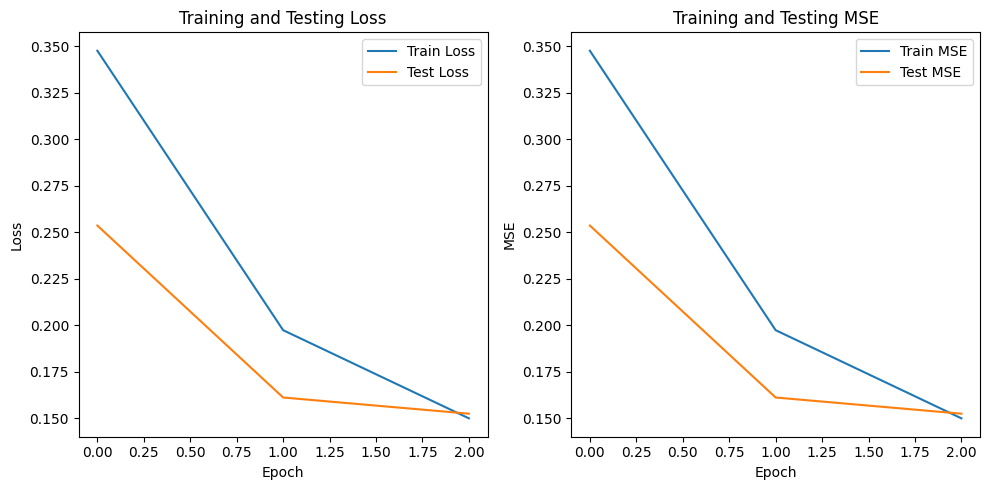

In [27]:
import matplotlib.pyplot as plt

# Plot training and testing losses and MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_mse, label='Train MSE')
plt.plot(test_mse, label='Test MSE')
plt.title('Training and Testing MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()


In [28]:
model_path = "resume_rating_model2"
model.bert.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)


('resume_rating_model2/tokenizer_config.json',
 'resume_rating_model2/special_tokens_map.json',
 'resume_rating_model2/vocab.txt',
 'resume_rating_model2/added_tokens.json')

In [29]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the model and tokenizer
model_path = "resume_rating_model2"
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(model_path)

# Set the model to evaluation mode
model.eval()

# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [30]:
def predict_rating(model, tokenizer, job_description, skills, max_len=256):
    # Preprocess the text inputs
    encoding = tokenizer.encode_plus(
        job_description + ' [SEP] ' + skills,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    # Move tensors to the appropriate device
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # Disable gradient calculation
    with torch.no_grad():
        # Forward pass, get logit predictions
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    # Convert logits to ratings (sigmoid activation for regression output)
    predicted_rating = torch.sigmoid(logits).item() * 5  # Assuming the rating scale is 1-5

    return predicted_rating


In [35]:

# Example usage
job_description = "Data scientist position requiring expertise in statistical analysis and machine learning."
skills = "Python, R, statistics, machine learning"

rating = predict_rating(model, tokenizer, job_description, skills)
print(f"Predicted Rating: {rating:.2f}")


Predicted Rating: 4.19
